In [1]:
!pip install mglearn
import pandas as pd
import matplotlib
import numpy as np
import scipy as sp
import IPython
import sklearn
import mglearn

In [2]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.datasets import make_circles # make_circle은 두 개의 차원에 작은 원을 포함하는 큰 원이 포함된 임의의 데이터 셋을 생성
X, y=make_circles(noise=0.25,factor=0.5,random_state=1)

In [3]:
y_named=np.array(["blue","red"])[y]
# 예제를 위해 클래스의 이름을 "blue"와 "red"로 바꿉니다.

In [4]:
from sklearn.model_selection import train_test_split 
X_train, X_test, y_train_named, y_test_named,y_train,y_test=train_test_split(X,y_named,y,random_state=0)

In [5]:
gbrt=GradientBoostingClassifier(random_state=0)
gbrt.fit(X_train,y_train_named)
# 그래디언트 부스팅 모델을 만듦

GradientBoostingClassifier(random_state=0)

2.4.1 결정함수

In [6]:
print("X_test.shape: {}".format(X_test.shape))
print("결정 함수 결과 형태: {}".format(gbrt.decision_function(X_test).shape))
# 이 값은 모델이 데이터 포인트가 양성클래스인 클래스 1에 속한다고 믿는 정도

X_test.shape: (25, 2)
결정 함수 결과 형태: (25,)


In [7]:
# 결정 함수 결과 중 앞부분 일부를 확인합니다.
print("결정함수: \n{}".format(gbrt.decision_function(X_test[:6])))

결정함수: 
[ 4.13592603 -1.70169917 -3.95106099 -3.62609552  4.28986642  3.66166081]


In [8]:
print("임계치와 결정 함수 결과 비교:\n{}".format(gbrt.decision_function(X_test)>0))
print("예측:\n{}".format(gbrt.predict(X_test)))

임계치와 결정 함수 결과 비교:
[ True False False False  True  True False  True  True  True False  True
  True False  True False False False  True  True  True  True  True False
 False]
예측:
['red' 'blue' 'blue' 'blue' 'red' 'red' 'blue' 'red' 'red' 'red' 'blue'
 'red' 'red' 'blue' 'red' 'blue' 'blue' 'blue' 'red' 'red' 'red' 'red'
 'red' 'blue' 'blue']


In [9]:
# 불리언 값을 0과 1로 변환합니다.
greater_zero=(gbrt.decision_function(X_test)>0).astype(int)
# classes_에 인덱스로 사용합니다.
pred=gbrt.classes_[greater_zero]
# pred와 gbrt.predict의 결과를 비교합니다.
print("pred는 예측 결과와 같다: {}".format(np.all(pred==gbrt.predict(X_test))))

pred는 예측 결과와 같다: True


In [10]:
decision_function=gbrt.decision_function(X_test)
print("결정 함수 최솟값: {:.2f} 최댓값: {:.2f}".format(np.min(decision_function),np.max(decision_function)))

결정 함수 최솟값: -7.69 최댓값: 4.29


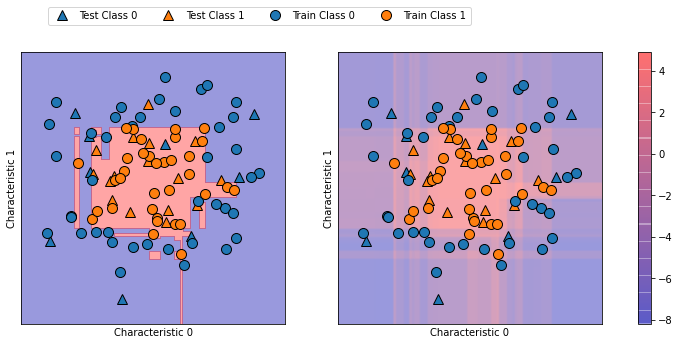

In [11]:
import matplotlib.pyplot as plt
fig, axes=plt.subplots(1,2,figsize=(13,5))
mglearn.tools.plot_2d_separator(gbrt,X,ax=axes[0],alpha=.4,fill=True,cm=mglearn.cm2)
scores_image=mglearn.tools.plot_2d_scores(gbrt,X,ax=axes[1],alpha=.4,cm=mglearn.ReBl)

for ax in axes:
    mglearn.discrete_scatter(X_test[:,0],X_test[:,1],y_test,markers='^',ax=ax)
    mglearn.discrete_scatter(X_train[:,0],X_train[:,1],y_train,markers='o',ax=ax)
    ax.set_xlabel("Characteristic 0")
    ax.set_ylabel("Characteristic 1")
cbar=plt.colorbar(scores_image,ax=axes.tolist())
axes[0].legend(["Test Class 0","Test Class 1", "Train Class 0", "Train Class 1"], ncol=4,loc=(.1,1.1))

2.4.2 예측 확률

In [12]:
print("확률 값의 형태: {}".format(gbrt.predict_proba(X_test).shape))

확률 값의 형태: (25, 2)


In [13]:
# predict_proba 결과 중 앞부분 일부를 확인합니다.
print("예측 확률:\n{}".format(gbrt.predict_proba(X_test[:6])))

예측 확률:
[[0.01573626 0.98426374]
 [0.84575653 0.15424347]
 [0.98112869 0.01887131]
 [0.97407033 0.02592967]
 [0.01352142 0.98647858]
 [0.02504637 0.97495363]]


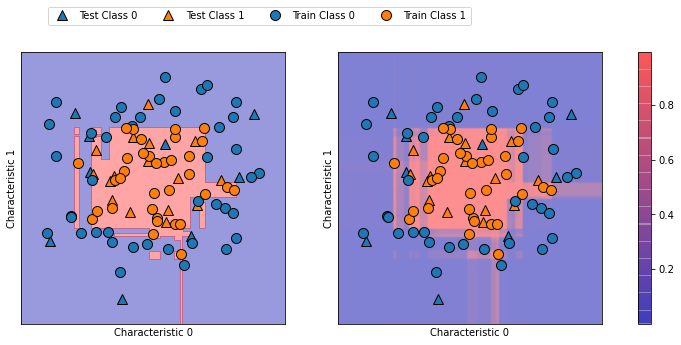

In [14]:
fig, axes=plt.subplots(1,2,figsize=(13,5))

mglearn.tools.plot_2d_separator(gbrt,X,ax=axes[0],alpha=.4,fill=True,cm=mglearn.cm2)
scores_image=mglearn.tools.plot_2d_scores(gbrt,X,ax=axes[1],alpha=.5,cm=mglearn.ReBl,function='predict_proba')

for ax in axes:
    mglearn.discrete_scatter(X_test[:,0],X_test[:,1],y_test,markers='^',ax=ax)
    mglearn.discrete_scatter(X_train[:,0],X_train[:,1],y_train,markers='o',ax=ax)
    ax.set_xlabel("Characteristic 0")
    ax.set_ylabel("Characteristic 1")
cbar=plt.colorbar(scores_image,ax=axes.tolist())
axes[0].legend(["Test Class 0","Test Class 1", "Train Class 0", "Train Class 1"], ncol=4,loc=(.1,1.1))

2.4.3 다중 분류에서의 불확실성

In [15]:
from sklearn.datasets import load_iris

iris=load_iris()
X_train, X_test, y_train, y_test=train_test_split(iris.data,iris.target,random_state=42)

gbrt=GradientBoostingClassifier(learning_rate=0.01, random_state=0)
gbrt.fit(X_train,y_train)

GradientBoostingClassifier(learning_rate=0.01, random_state=0)

In [16]:
print("결정 함수의 결과 형태: {}".format(gbrt.decision_function(X_test).shape))
#decision function 결과 중 앞부분 일부를 확인합니다.
print("결정 함수 결과:\n{}".format(gbrt.decision_function(X_test)[:6,:]))

결정 함수의 결과 형태: (38, 3)
결정 함수 결과:
[[-1.995715    0.04758267 -1.92720695]
 [ 0.06146394 -1.90755736 -1.92793758]
 [-1.99058203 -1.87637861  0.09686725]
 [-1.995715    0.04758267 -1.92720695]
 [-1.99730159 -0.13469108 -1.20341483]
 [ 0.06146394 -1.90755736 -1.92793758]]


In [17]:
print("가장 큰 결정 함수의 인덱스:\n{}".format(np.argmax(gbrt.decision_function(X_test),axis=1)))
print("예측:\n{}".format(gbrt.predict(X_test)))

가장 큰 결정 함수의 인덱스:
[1 0 2 1 1 0 1 2 1 1 2 0 0 0 0 1 2 1 1 2 0 2 0 2 2 2 2 2 0 0 0 0 1 0 0 2 1
 0]
예측:
[1 0 2 1 1 0 1 2 1 1 2 0 0 0 0 1 2 1 1 2 0 2 0 2 2 2 2 2 0 0 0 0 1 0 0 2 1
 0]


In [18]:
# predict_proba결과 중 앞부분 일부를 확인합니다.
print("예측 확률:\n{}".format(gbrt.predict_proba(X_test)[:6]))
# 행 방향으로 확률을 더하면 1이 됩니다.
print("합: {}".format(gbrt.predict_proba(X_test)[:6].sum(axis=1)))

예측 확률:
[[0.10217718 0.78840034 0.10942248]
 [0.78347147 0.10936745 0.10716108]
 [0.09818072 0.11005864 0.79176065]
 [0.10217718 0.78840034 0.10942248]
 [0.10360005 0.66723901 0.22916094]
 [0.78347147 0.10936745 0.10716108]]
합: [1. 1. 1. 1. 1. 1.]


In [19]:
print("가장 큰 예측 확률의 인덱스:\n".format(np.argmax(gbrt.predict_proba(X_test),axis=1)))
print("예측:\n{}".format(gbrt.predict(X_test)))

가장 큰 예측 확률의 인덱스:

예측:
[1 0 2 1 1 0 1 2 1 1 2 0 0 0 0 1 2 1 1 2 0 2 0 2 2 2 2 2 0 0 0 0 1 0 0 2 1
 0]


In [20]:
from sklearn.linear_model import LogisticRegression
logreg=LogisticRegression()

# iris 데이터셋의 타깃을 클래스 이름으로 나타내기
named_target=iris.target_names[y_train]
logreg.fit(X_train,named_target)
print("훈련 데이터에 있는 클래스 종류: {}".format(logreg.classes_))
print("예측: {}".format(logreg.predict(X_test)[:10]))
argmax_dec_func=np.argmax(logreg.decision_function(X_test),axis=1)
print("가장 큰 결정 함수의 인덱스: {}".format(argmax_dec_func[:10]))
print("인덱스를 classes_에 연결: {}".format(logreg.classes_[argmax_dec_func][:10]))

훈련 데이터에 있는 클래스 종류: ['setosa' 'versicolor' 'virginica']
예측: ['versicolor' 'setosa' 'virginica' 'versicolor' 'versicolor' 'setosa'
 'versicolor' 'virginica' 'versicolor' 'versicolor']
가장 큰 결정 함수의 인덱스: [1 0 2 1 1 0 1 2 1 1]
인덱스를 classes_에 연결: ['versicolor' 'setosa' 'virginica' 'versicolor' 'versicolor' 'setosa'
 'versicolor' 'virginica' 'versicolor' 'versicolor']


C:\Users\shinyoungmin\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
